In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Exploratory Data Analysis (EDA)**
Lets understand the data sturctures and identify outliers, patterns and relationships and clean the data.

In [140]:
#importing libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [141]:
# reading the csv files:

train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
#gender_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

There are 2 main datasets: Train and Test. 

Train dataset includes the column 'Survived' with binary values of 1 = True and 0 = False. and because we want to predict if the passengers have survived or not, we will work with this one. But befor that, we need to understand it. 

The Test dataset excludes this column. 

In [142]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In this part I will use: shape, describe() methods

In [143]:
train_data.shape

(891, 12)

In [144]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
train_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [146]:
print(train_data.info(),'\n')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

Let's check the dupkicates:

In [147]:
train_data.duplicated().sum()

test_data.duplicated().sum()

0

Here I will check **how many null values is in the dataset**. 

In [148]:
print(f'Train data:\n{train_data.isnull().sum()}\n')
print(f'Test data:\n{test_data.isnull().sum()}')

Train data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**The only columns with missing values are: Age, Cabin, Embarked and Fare**.

For now we will handle the easier ones:

Notice 2 missing values in column Embarked - we can simply fill that with the most occured value and 1 missing value in Fare.


In [149]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [150]:
train_data.fillna({'Embarked': 'S'}, inplace=True)

Now we will handle the Fare column:

In [151]:
test_data.Fare.mean()
test_data.fillna({'Fare': '36'}, inplace=True)


Let's see the % of missing values in Cabin column.

In [152]:
print('Train data:', (train_data['Cabin'].isnull().sum())/train_data.shape[0]*100)
print('Test data:', (test_data['Cabin'].isnull().sum())/test_data.shape[0]*100)

# Dropping the Cabin column in each of the datasets:

train_data.drop(labels = 'Cabin' , inplace = True , axis = 1)
test_data.drop(labels = 'Cabin' , inplace = True , axis = 1)

Train data: 77.10437710437711
Test data: 78.22966507177034


We can see that there is **77% of Cabin data missing** in **Train dataset**. 

We can see that there is **78% of Cabin data missing** in **Test dataset**. 

That is a lots of data for Cabin, but we have to think. Is the Cabin column relevant to us? If we knew where the cabins were located then yes, but we are not provided this information, therefore we can drop that column.

In [153]:
# Checking the % of missing Age data:

print('Train data_Age:', (train_data['Age'].isnull().sum())/train_data.shape[0]*100)
print('Test data_Age:', (test_data['Age'].isnull().sum())/test_data.shape[0]*100)

Train data_Age: 19.865319865319865
Test data_Age: 20.574162679425836


In here we see that **20% of data in Age column missing in Train Data** set and **21% is missing in Test data set**. We won't drop these columns because there data are valuable to us as a predictor of the survival rate.

Let's first manage the age column - it can be resolved by **refilling the NaN values with the mean**. BUT there are 3 Pclasses so we have to consider to fill the mean age accordingly, because each of the Pclasses have different Age distribution. 

Let's do some visualization and plots



Mean of Age for Train data: 29.69911764705882



Text(0.5, 1.0, 'TRAIN_data_AGE')

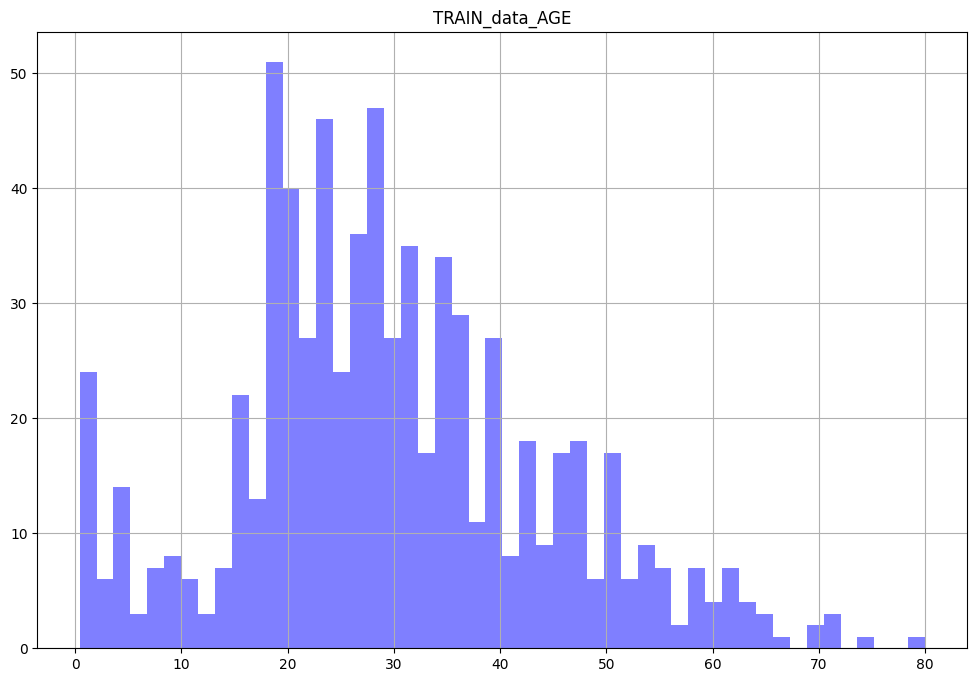

In [154]:
print(f'Mean of Age for Train data: {train_data["Age"].mean()}')
print()
plt.figure(figsize=(12,8))
train_data['Age'].hist(alpha=0.5,color='blue',bins=50)
plt.title("TRAIN_data_AGE")

Mean of Age for Test data: 30.272590361445783



Text(0.5, 1.0, 'TEST_data_AGE')

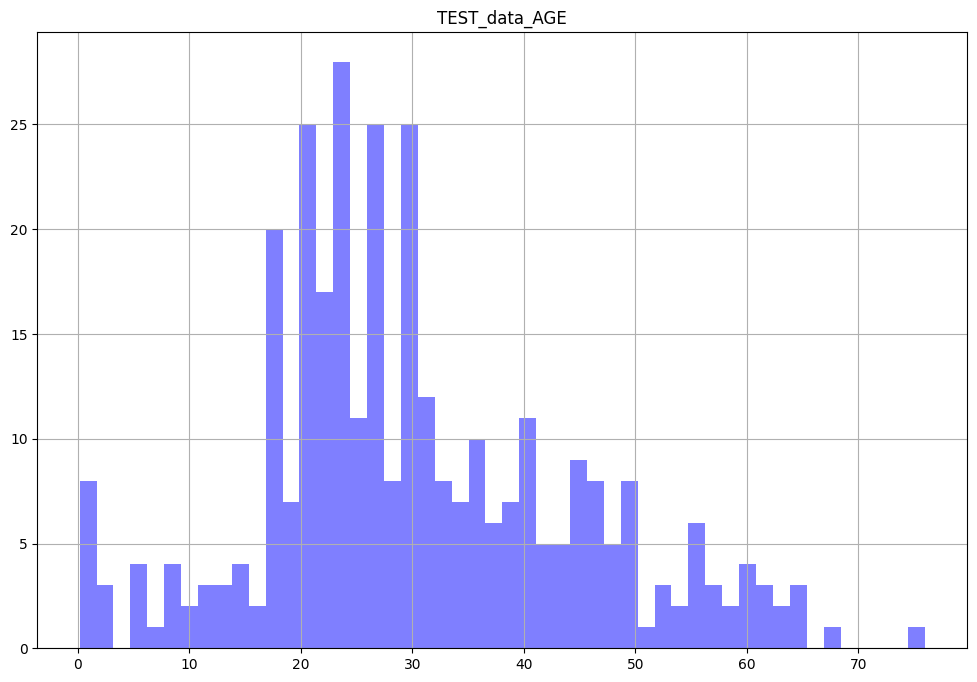

In [155]:
print(f'Mean of Age for Test data: {test_data["Age"].mean()}')

print()

plt.figure(figsize=(12,8))
test_data['Age'].hist(alpha=0.5,color='blue',bins=50)
plt.title('TEST_data_AGE')

We checked the mean values for both datasets. Now we will check the Age mean value distribution in Pclasses with boxplot

Text(0.5, 1.0, 'TEST_DATA')

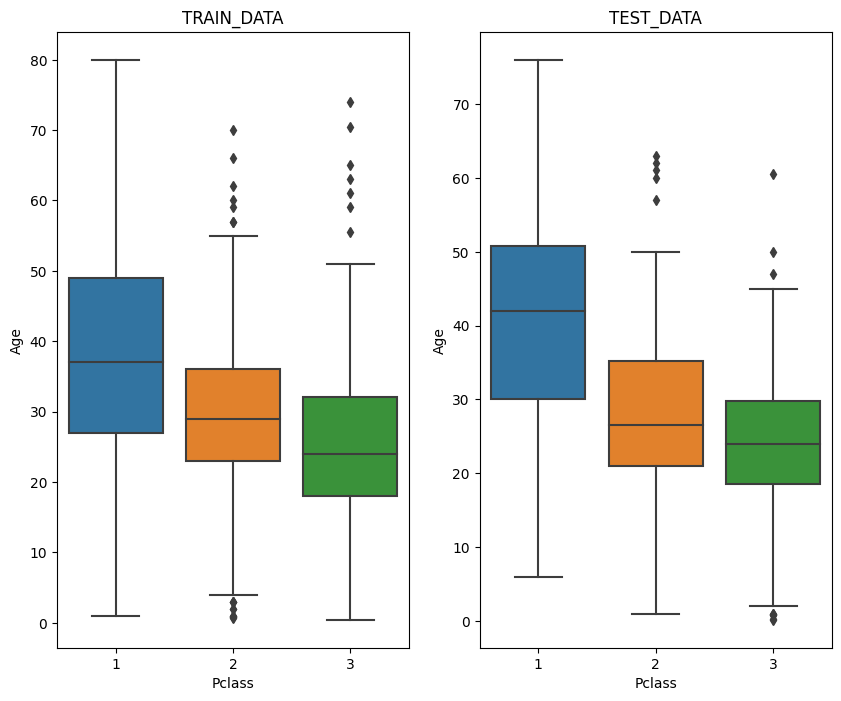

In [156]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
sns.boxplot(train_data, x='Pclass', y='Age')
plt.title('TRAIN_DATA')

plt.subplot(1, 2, 2)
sns.boxplot(test_data, x='Pclass', y='Age')
plt.title('TEST_DATA')

In [157]:
print('Train_data: \n',train_data.groupby(['Pclass'])['Age'].mean())

print()

print('Tets_data: \n',test_data.groupby(['Pclass'])['Age'].mean())

Train_data: 
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Tets_data: 
 Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


Here we have visualized the mean value of age in both datasets with boxplots and then We have computed the age mean for the pclasses. Notice that the mean age for the 1st class is higher and for 3rd class is lower. 

We will fill NaN values accordingly. 

In [158]:
for x in train_data['Pclass']:
    if x == 1:
        train_data.fillna({'Age': 38}, inplace=True)
    elif x == 2:
        train_data.fillna({'Age': 30}, inplace=True)
    elif x == 3:
        train_data.fillna({'Age': 25}, inplace=True)

# we do the same for the second dataset:

for i in test_data['Pclass']:
    if i == 1:
        test_data.fillna({'Age': 41}, inplace=True)
    elif i == 2:
        test_data.fillna({'Age': 29}, inplace=True)
    elif i == 3:
        test_data.fillna({'Age': 24}, inplace=True)

Now let's check if we have any null values left

In [159]:
print(f'Train data:\n{train_data.isnull().sum()}\n')
print(f'Test data:\n{test_data.isnull().sum()}')

Train data:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Test data:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# More visualization
Now let's see the CORRELATION between the variables! 

We will:
- do OneHotEncoding
- drop the categorical columns

In [160]:
train_data_dumm = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
train_data_dumm.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


<Axes: >

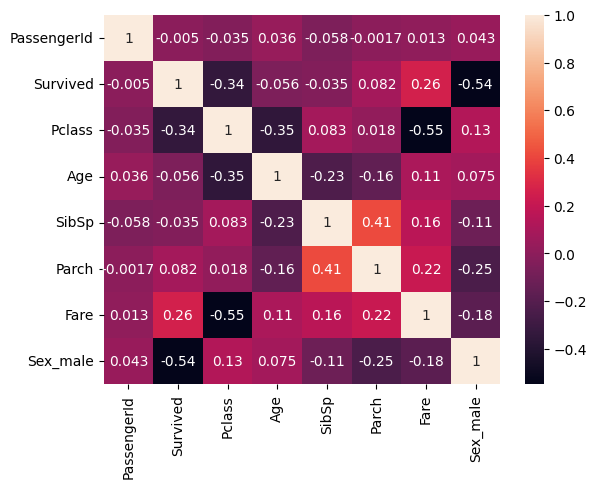

In [161]:
sns.heatmap(train_data_dumm.drop(['Name','Ticket','Embarked_Q', 'Embarked_S'], axis=1).corr(), annot=True)

Let's see how many ppl did survive:
- count
- %
- plotting
- difference between the 'Sex'
- difference between the 'Age'

Survived
0    549
1    342
Name: count, dtype: int64

Percentage of Pll that survived: 38.38


Text(0.5, 1.0, 'Survival rate')

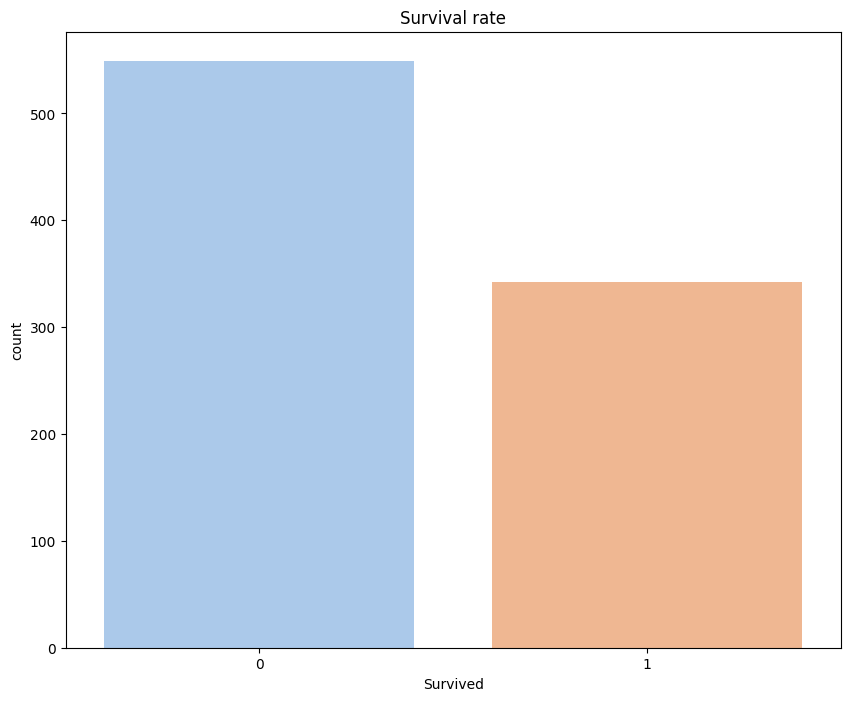

In [162]:
print(train_data['Survived'].value_counts())

# let's see the percentage 
survivors = train_data['Survived'].sum()/train_data['Survived'].count() * 100
print('\nPercentage of Pll that survived:', round(survivors,2))

plt.figure(figsize=(10,8))
sns.countplot(train_data, x='Survived', palette='pastel')
plt.title('Survival rate')


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

Percentage of male survivors: 31.87

Percentage of female survivors: 68.13


Text(0.5, 1.0, 'Survival rate by Sex')

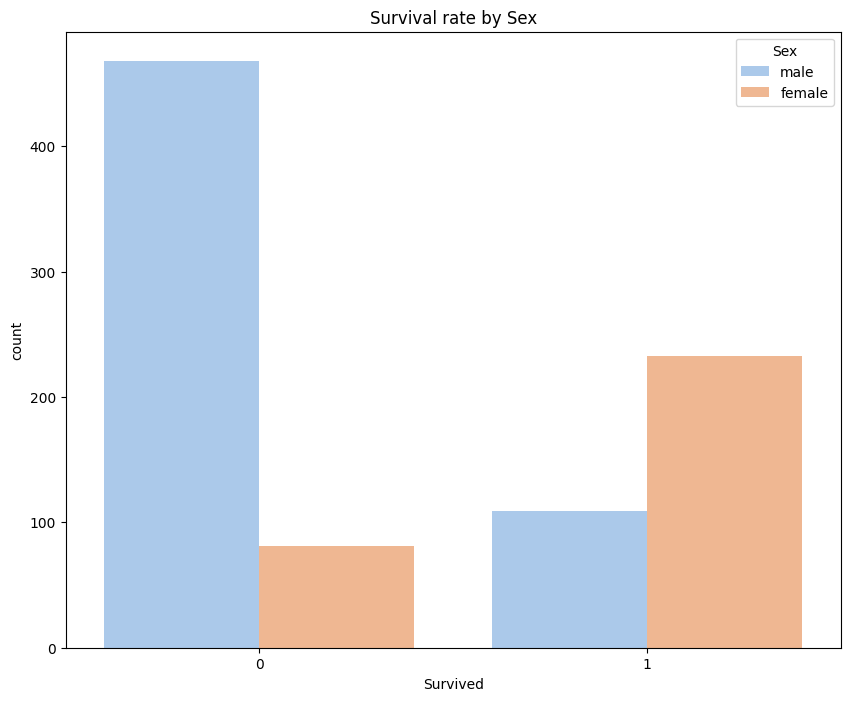

In [163]:
print(train_data.groupby(['Survived', 'Sex'])['Survived'].count())
print()

# % of survivors by 'Sex':
percentage_male_survivors = (train_data[train_data['Survived'] == 1]['Sex'] == 'male').sum() / (train_data['Survived'] == 1).sum() * 100
print(f'Percentage of male survivors: {round(percentage_male_survivors,2)}\n')

percentage_female_survivors = (train_data[train_data['Survived'] == 1]['Sex'] == 'female').sum() / (train_data['Survived'] == 1).sum() * 100
print(f'Percentage of female survivors: {round(percentage_female_survivors,2)}')

plt.figure(figsize=(10,8))
sns.countplot(train_data, x='Survived', hue= 'Sex', palette='pastel')
plt.title('Survival rate by Sex')

In [164]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)
print(f'% of women who survived: {round(rate_women,2)}')

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/ len(men)
print(f'% of men who survived: {round(rate_men,2)}')

% of women who survived: 0.74
% of men who survived: 0.19


Let's explore the survival rate of the Pclass column:

Text(0.5, 1.0, 'Survival rate by Pclass')

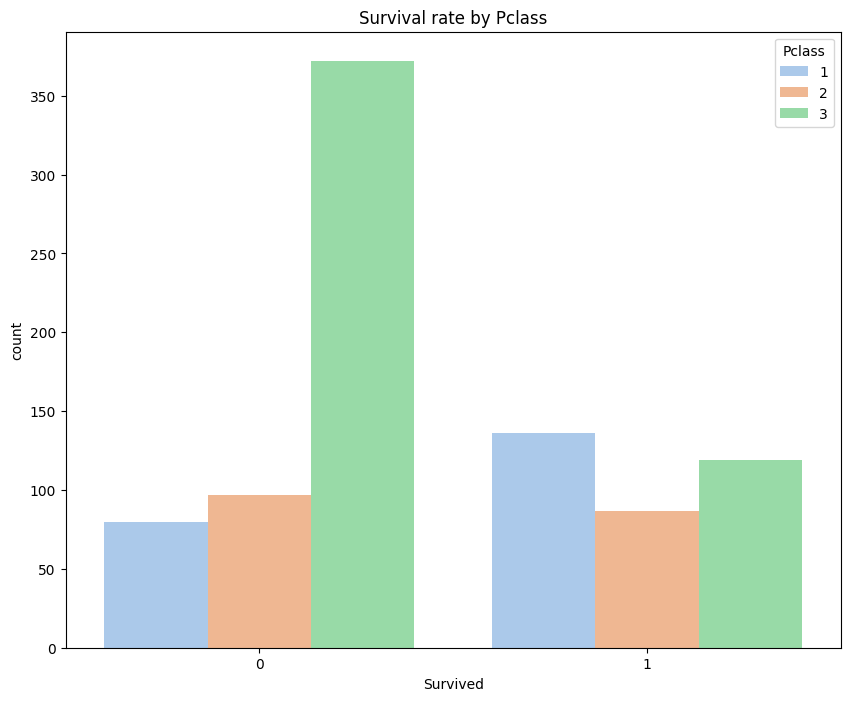

In [165]:
plt.figure(figsize=(10,8))
sns.countplot(train_data, x='Survived', hue= 'Pclass', palette='pastel')
plt.title('Survival rate by Pclass')

Now, let's combine Pclass, Sex and Survived columns in pointplot:

Text(0.5, 1.0, 'Survivors by Pclass and gender')

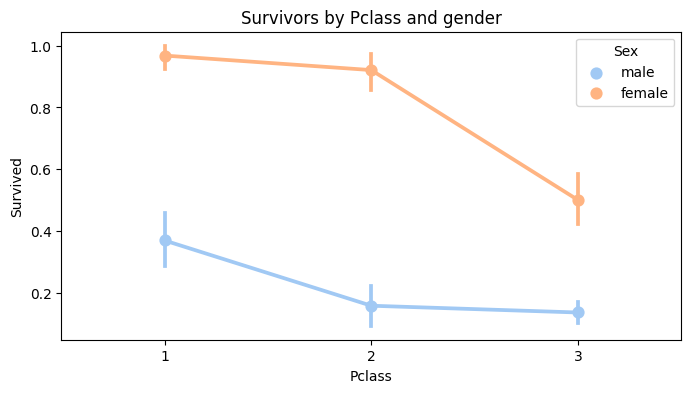

In [166]:
plt.figure(figsize=(8,4))
sns.pointplot(train_data, x='Pclass', y='Survived', hue='Sex', palette='pastel')
plt.title('Survivors by Pclass and gender')


To explore more demografics we will create a plots with SibSp and Parch columns.

Text(0.5, 0, 'Siblings or Spouses')

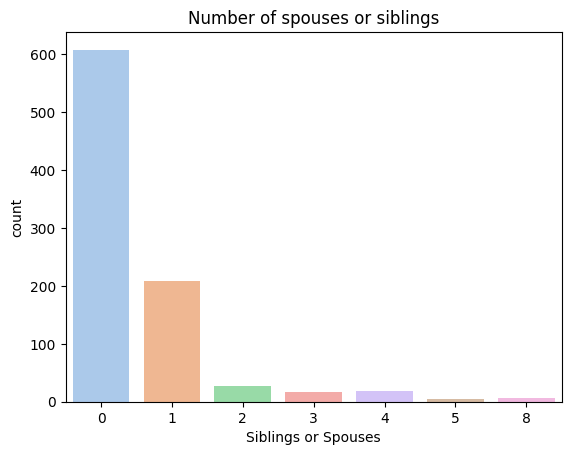

In [167]:
sns.countplot(train_data, x='SibSp', palette='pastel')
plt.title('Number of spouses or siblings')
plt.xlabel('Siblings or Spouses')

Text(0.5, 1.0, 'Siblings or Spouses survival rate')

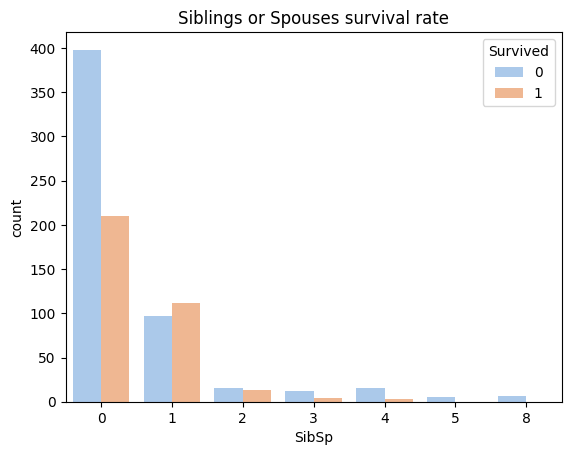

In [168]:
sns.countplot(data=train_data, x='SibSp', hue='Survived', palette='pastel')
plt.title('Siblings or Spouses survival rate')

Text(0.5, 0, 'Parents or children')

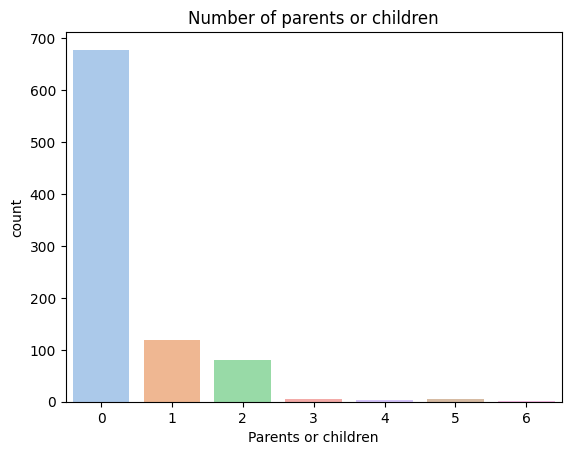

In [169]:
sns.countplot(train_data, x='Parch', palette='pastel')
plt.title('Number of parents or children')
plt.xlabel('Parents or children')

Text(0.5, 1.0, 'Parents or children survival rate')

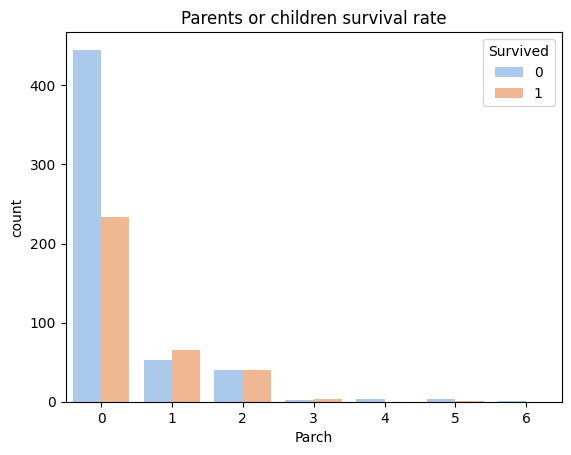

In [170]:
sns.countplot(data=train_data, x='Parch', hue='Survived', palette='pastel')
plt.title('Parents or children survival rate')

Hereby I'd like to explore if there were solo travelers.
- I create a new column 'Has_family'
- Will check how many ppl do have family

(just to keep in mind the engaged couple won't be considered as a family member)

In [171]:
# creating 'Has_family' column and calculating the family members

train_data['Has_family'] = train_data.SibSp + train_data.Parch
train_data.loc[train_data['Has_family']>1, 'Has_family'] = 1

#calculating how many ppl travel solo
solo_travelrs = train_data.Has_family.count() - train_data.Has_family.sum()
print('People traveling alone: ', solo_travelrs)
#percentage
solo_travelrs_per = (train_data.Has_family.sum() / train_data.Has_family.count()) *100
print('Percentage of people traveling alone:', round(solo_travelrs_per,2))

People traveling alone:  537
Percentage of people traveling alone: 39.73


Now lets explore Fare column:


In [172]:
print('Fare.min', round(train_data.Fare.min(),2))
print('Fare.max', round(train_data.Fare.max(),2))
print('Fare.median', round(train_data.Fare.median(),2))
print('Fare.mean', round(train_data.Fare.mean(),2))


def findFareGroup(fare):
    if fare<train_data.Fare.median():
        return "cheap"
    elif fare>=train_data.Fare.median() and fare<train_data.Fare.mean():
        return "regular"
    else:
        return "expensive"
    
train_data['FareGroup']=train_data['Fare'].apply(lambda x: findFareGroup(x))

empty_df = pd.DataFrame([])
grouped_df = train_data.groupby('FareGroup', as_index = False).PassengerId.nunique()
append_df = pd.concat([empty_df,grouped_df ])
append_df

Fare.min 0.0
Fare.max 512.33
Fare.median 14.45
Fare.mean 32.2


,FareGroup,PassengerId
0,cheap,440
1,expensive,211
2,regular,240


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Fare prices')

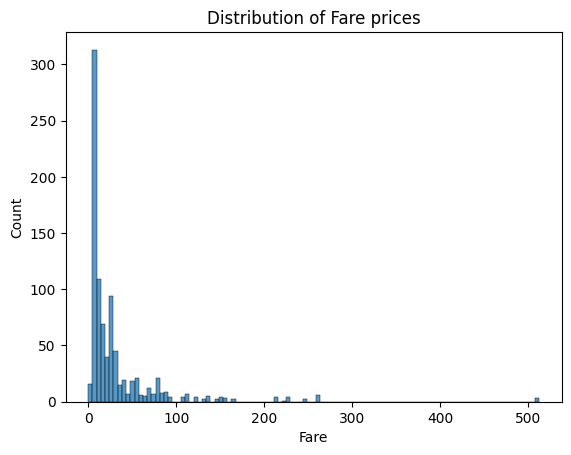

In [173]:
sns.histplot(train_data, x='Fare')
plt.title('Distribution of Fare prices')

# Data cleaning and preparation for model building 

AND NOW LET'S PREPARE THE DATA SET FOR THE MODELS

In [174]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_family,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,cheap


In [175]:
X = train_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Has_family', 'FareGroup'], axis=1)
y = train_data['Survived']

In [176]:
# let's check the X dataset

X.head()

print(X.index)
# we see that there are two columns that have to be transformed to binary values

RangeIndex(start=0, stop=891, step=1)


In [177]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [178]:
X = X.astype(int)
print(X.index)

RangeIndex(start=0, stop=891, step=1)


In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25
                                                   )

In [181]:
print(X_test.index)

Index([852, 685, 826,  99, 885, 634, 455, 841, 807,  88,
       ...
       460, 514, 157, 655, 258, 496, 231, 667, 274, 597],
      dtype='int64', length=223)


**CONCLUSION OF THE EDA:**





-

# Model Building 

List of used models:

- LogisticRegression
- Decision Tree
- Random forest
- SVC + GridsearchCV
- K Nearest Neighbors Classifier

In the endo of this part I will evaluate which model performed the best (the accuracy_score is also used to evaluate the scores).

In [182]:
# importing all needed libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [183]:
# implementing a dictionary of the models prediction accuracies
model_accuracy_dict = {}

**1. Logistic Regression**

In [184]:
# implementing Logistic r model
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# creating predictions
y_log_predictions = log_model.predict(X_test)

# adding the value to the dictionary
model_accuracy_dict['Logistic Regression'] = accuracy_score(y_test, y_log_predictions)

print('classification_report \n',classification_report(y_test,y_log_predictions))
print('confusion_matrix \n',confusion_matrix(y_test,y_log_predictions))


classification_report 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       144
           1       0.64      0.62      0.63        79

    accuracy                           0.74       223
   macro avg       0.72      0.71      0.71       223
weighted avg       0.74      0.74      0.74       223

confusion_matrix 
 [[116  28]
 [ 30  49]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**2. Decision Tree**

In [185]:
d_tree = DecisionTreeClassifier()

d_tree.fit(X_train, y_train)

y_d_tree_pred = d_tree.predict(X_test)

model_accuracy_dict['Decision Tree'] = accuracy_score(y_test, y_d_tree_pred)

print('classification_report \n',classification_report(y_test,y_d_tree_pred))
print('confusion_matrix \n', confusion_matrix(y_test,y_d_tree_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       144
           1       0.65      0.67      0.66        79

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223

confusion_matrix 
 [[116  28]
 [ 26  53]]


**3. Random forest**

In [186]:
rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train,y_train)

y_rfc_pred = rfc.predict(X_test)

model_accuracy_dict['Random Forest'] = accuracy_score(y_test, y_rfc_pred)

print('classification_report \n',classification_report(y_test, y_rfc_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_rfc_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       144
           1       0.72      0.73      0.73        79

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

confusion_matrix 
 [[121  23]
 [ 21  58]]


**4. SVC**

In [187]:
svc_model = SVC()

svc_model.fit(X_train,y_train)

y_svc_model_pred = svc_model.predict(X_test)

model_accuracy_dict['SVC'] = accuracy_score(y_test, y_svc_model_pred)

print('classification_report \n',classification_report(y_test, y_svc_model_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_svc_model_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.70      0.89      0.79       144
           1       0.61      0.32      0.42        79

    accuracy                           0.69       223
   macro avg       0.66      0.60      0.60       223
weighted avg       0.67      0.69      0.65       223

confusion_matrix 
 [[128  16]
 [ 54  25]]


**4.1 GridsearchCV**

In [188]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

y_grid_pred = grid.predict(X_test)

model_accuracy_dict['GridsearchCV'] = accuracy_score(y_test, y_grid_pred)

print('classification_report \n',classification_report(y_test, y_grid_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_grid_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

**5. K Nearest Neighbors Classifier**

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

y_knn_pred = knn.predict(X_test)

model_accuracy_dict['KNN'] = accuracy_score(y_test, y_knn_pred)

print('classification_report \n',classification_report(y_test, y_knn_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_knn_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       144
           1       0.52      0.56      0.54        79

    accuracy                           0.66       223
   macro avg       0.64      0.64      0.64       223
weighted avg       0.67      0.66      0.67       223

confusion_matrix 
 [[104  40]
 [ 35  44]]


In [190]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

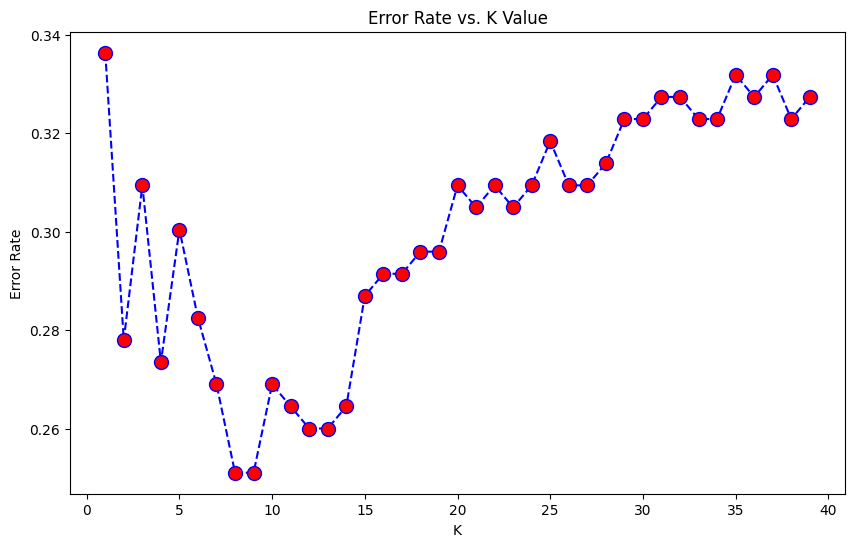

In [191]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [192]:
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train,y_train)

y_knn_pred = knn.predict(X_test)

model_accuracy_dict['KNN'] = accuracy_score(y_test, y_knn_pred)

print('classification_report \n',classification_report(y_test, y_knn_pred))
print('confusion_matrix \n', confusion_matrix(y_test, y_knn_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       144
           1       0.62      0.43      0.51        79

    accuracy                           0.70       223
   macro avg       0.68      0.64      0.65       223
weighted avg       0.69      0.70      0.69       223

confusion_matrix 
 [[123  21]
 [ 45  34]]


In [193]:
model_accuracy_dict

{'Logistic Regression': 0.7399103139013453,
 'Decision Tree': 0.757847533632287,
 'Random Forest': 0.8026905829596412,
 'SVC': 0.6860986547085202,
 'GridsearchCV': 0.7713004484304933,
 'KNN': 0.7040358744394619}

In [194]:
passenger_ids = test_data['PassengerId']

In [195]:
X_test_data = test_data.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [196]:
X_test_data = pd.get_dummies(X_test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [197]:
X_test_data = X_test_data.astype(int)
X_test_data.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34,0,0,7,1,1,0
1,3,47,1,0,7,0,0,1
2,2,62,0,0,9,1,1,0
3,3,27,0,0,8,1,0,1
4,3,22,1,1,12,0,0,1


In [198]:
y_test_predictions = log_model.predict(X_test_data)

# Create the output DataFrame with PassengerId and predictions
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_test_predictions})

# Save the output DataFrame to a CSV file
output.to_csv('submission.csv', index=False)
print("Saved!")

Saved!
